In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("flaredown_trackable_data_080316.csv")
df['checkin_date'] = pd.to_datetime(df['checkin_date'])

print df.head()

   user_id checkin_date  trackable_id trackable_type      trackable_name  \
0        3   2015-11-26          1069      Condition  Ulcerative colitis   
1        6   2015-11-26          1069      Condition  Ulcerative colitis   
2        8   2015-06-22           269      Condition     Crohn's disease   
3        9   2015-05-26           421      Condition       Gastroparesis   
4        9   2015-05-26           152        Symptom              Nausea   

  trackable_value  
0               0  
1               0  
2               3  
3               2  
4               1  


In [2]:
#It looks like some users have created an account without using the app for more than a single entry.  So lets remove them.

by_user = df.groupby('user_id')
df = by_user.filter(lambda x: len(x) > 1)

In [3]:
#What are the most well represented conditions?
df_conditions = df[df['trackable_type'] == 'Condition']
print df_conditions['trackable_name'].value_counts().head(20)

Depression                  4790
Anxiety                     4028
Fibromyalgia                3576
Chronic fatigue syndrome    3220
Migraine                    2403
Headaches                   1553
Irritable bowel syndrome    1465
Endometriosis               1379
Ehlers-Danlos syndrome      1280
Asthma                      1173
Idiopathic hypersomnia      1037
Hypothyroidism               922
Fatigue                      909
Dysautonomia                 880
IBS                          861
Crohn's disease              851
Lyme disease                 812
Ulcerative colitis           795
Allergies                    792
joint pain                   783
Name: trackable_name, dtype: int64


In [4]:
#Since Depression is well represented in the data, how many individual users are reporting depression?
just_depression = df[df['trackable_name'] == 'Depression']
depression_by_user = just_depression.groupby('user_id')
print len(depression_by_user)

547


In [5]:
#Do any of the conditions seem heavily correlated?

df_conditions = df[df['trackable_type'] == 'Condition']

df_conditions = df_conditions.drop('trackable_id',1)
df_conditions = df_conditions.drop('trackable_type',1)
df_conditions = df_conditions.drop('checkin_date',1)
df_conditions = df_conditions.drop('trackable_value',1)
df_conditions = pd.get_dummies(df_conditions)
conditions_by_user = df_conditions.groupby('user_id').sum()

corrs = conditions_by_user.corr()

#print just the substantial corrs (There are still a lot of them) #TODO filter by pvalue
#for name, values in corrs.iteritems():
#    for value in values:
#        if value > 0.9 and value != 1:
#            print name + str(value)

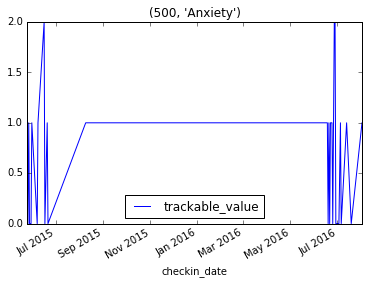

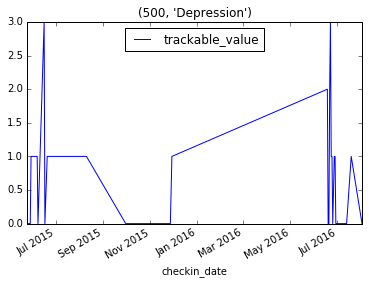

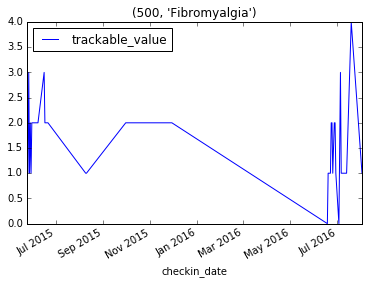

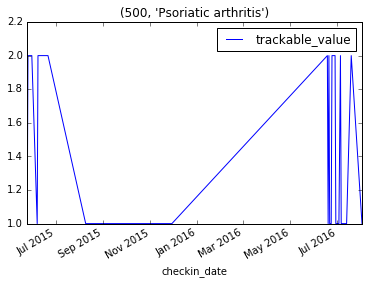

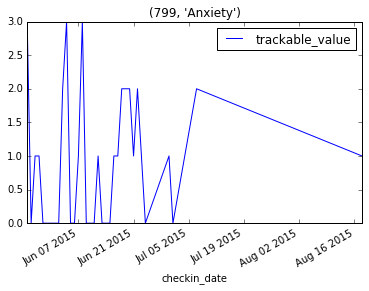

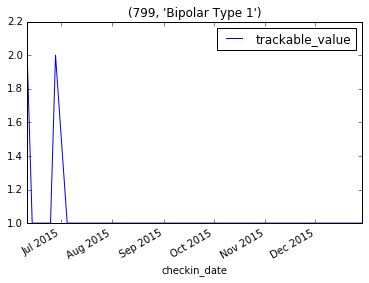

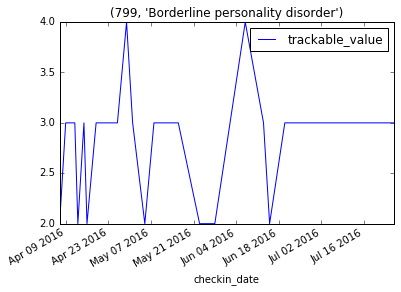

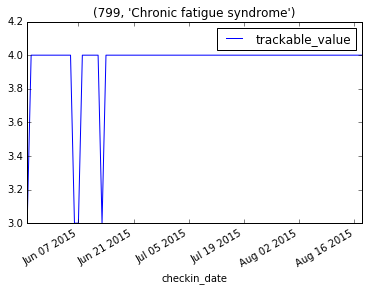

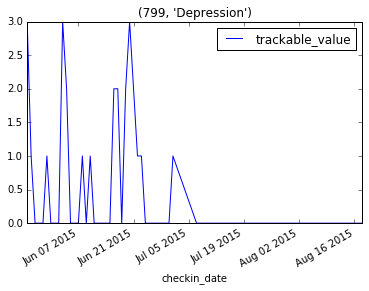

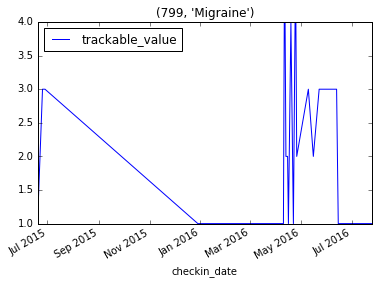

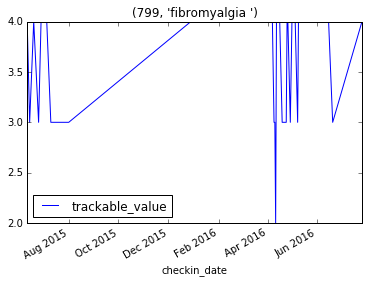

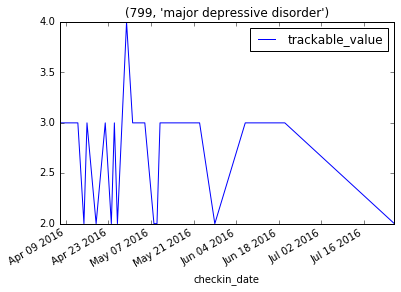

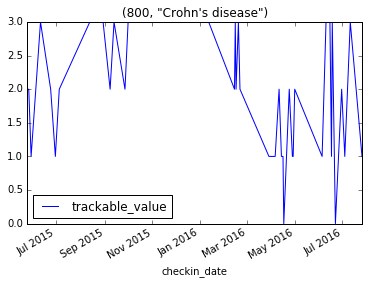

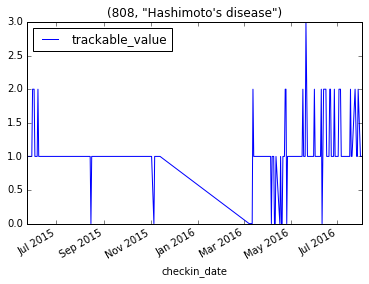

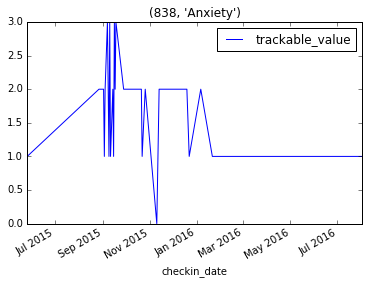

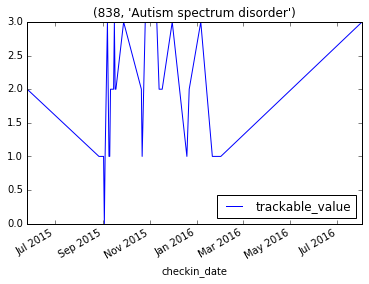

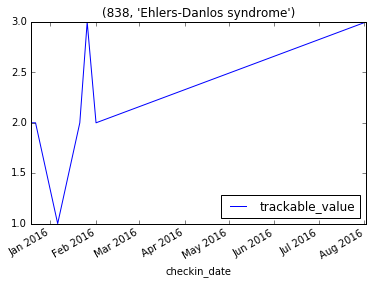

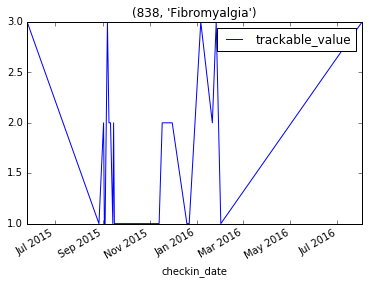

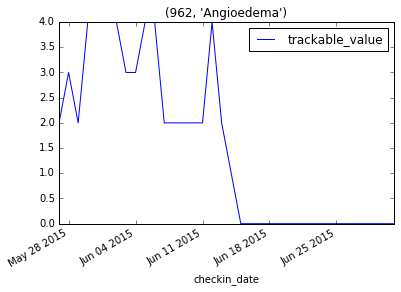

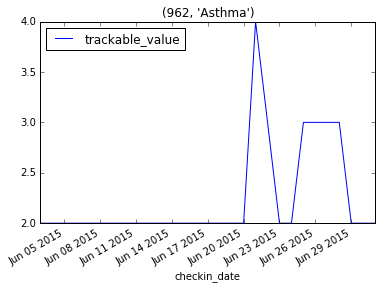

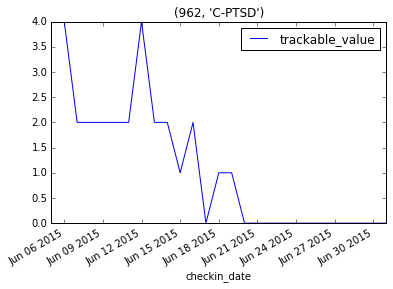

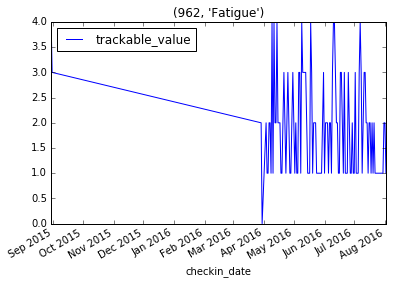

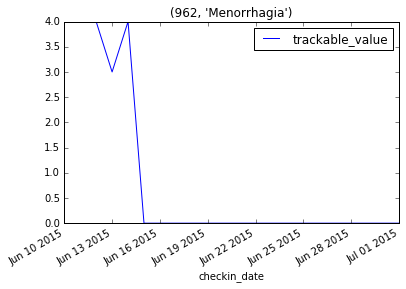

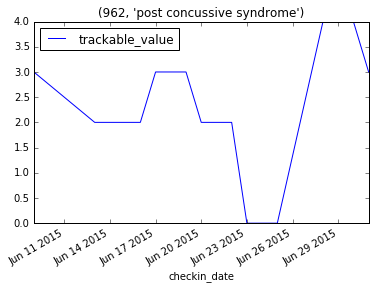

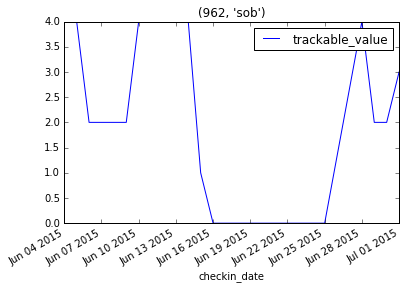

In [16]:
#On average, are people finding relief from these conditions?
#lets grab users that have been logging for a while, and look at their trends
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

def find_duration(x):
    return x.values[len(x)-1] - x.values[0]

df_with_duration = df[df['trackable_type'] == 'Condition']
df_with_duration['duration'] = df.groupby('user_id')['checkin_date'].transform(find_duration)
df_with_duration['duration'] = pd.to_numeric(df_with_duration['duration'])
#df_with_duration['trackable_value'] = pd.to_numeric(df['trackable_value'])
df_with_duration = df_with_duration.convert_objects(convert_numeric=True)

df_with_duration = df_with_duration.sort('duration', ascending=False)
just_high_duration = df_with_duration[df_with_duration['duration'] > 36500000000000000]

for i, group in just_high_duration.groupby(['user_id','trackable_name']):
    if (len(group) > 1 and len(group) < 200):  #filtering the 200's because they aren't super legible anyways, take this line out for a more complete look
        plt.figure()
        group.plot(x='checkin_date', y='trackable_value', title=str(i))

In [23]:
#How complete is the data we are getting from each user?
print "Average duration that users logged : " + str(df_with_duration['duration'].mean() / 86400000000000) + " days"


def count_days(x):
    return len(set(x))

df_with_count = df.copy()
df_with_count['count'] = df.groupby('user_id')['checkin_date'].transform(count_days)
df_with_count['count'] = pd.to_numeric(df_with_count['count'])
print "Average number of tracked days per user : " + str(df_with_count['count'].mean())

Average duration that users logged : 176.399208682 days
Average number of tracked days per user : 157.946801867
